<a href="https://colab.research.google.com/github/emergingsana123/Iris_decisiontree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report



In [2]:
data = pd.read_csv('/content/Iris (1).csv')


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.drop(['Id'], axis=1, inplace=True)


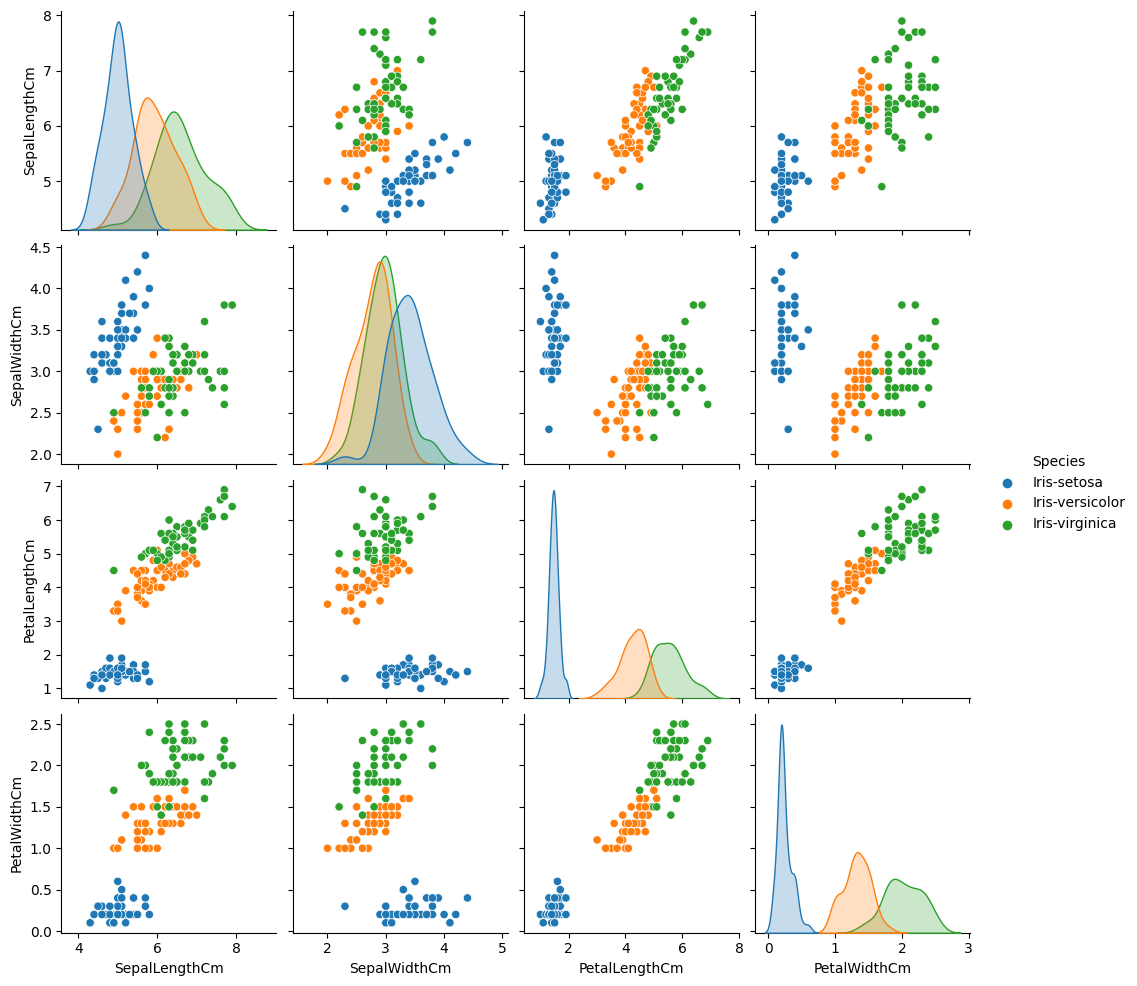

In [7]:
sns.pairplot(data, hue='Species')
plt.show()


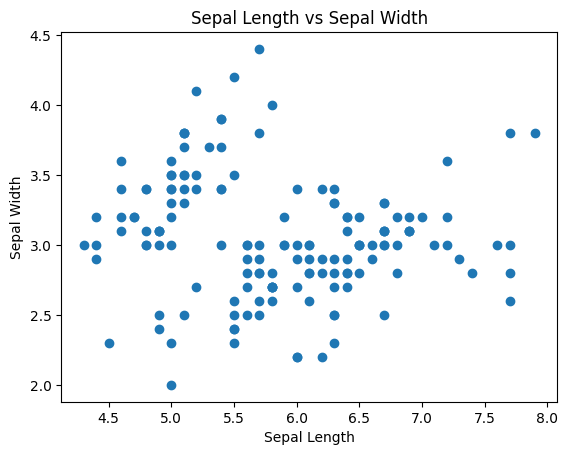

In [8]:
# prompt: data visualize using graphs plots

plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


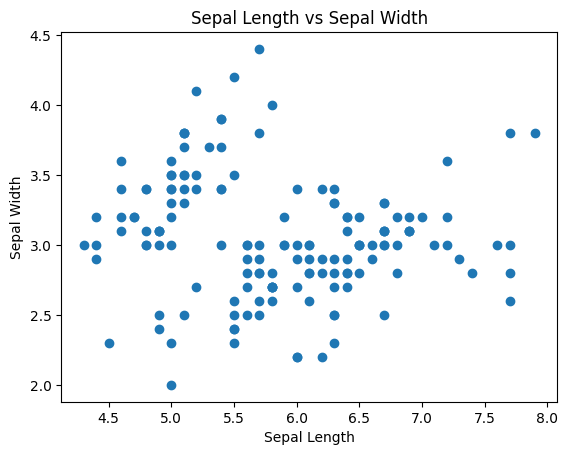

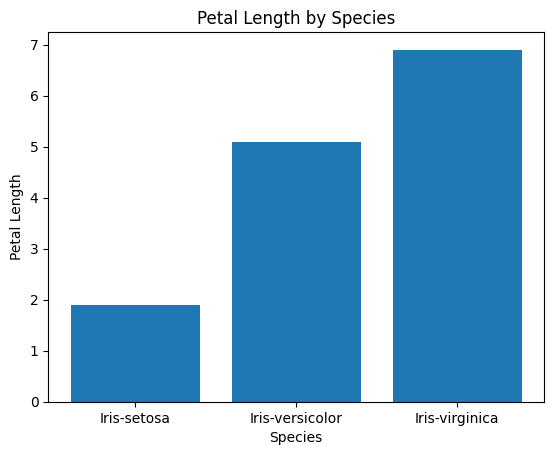

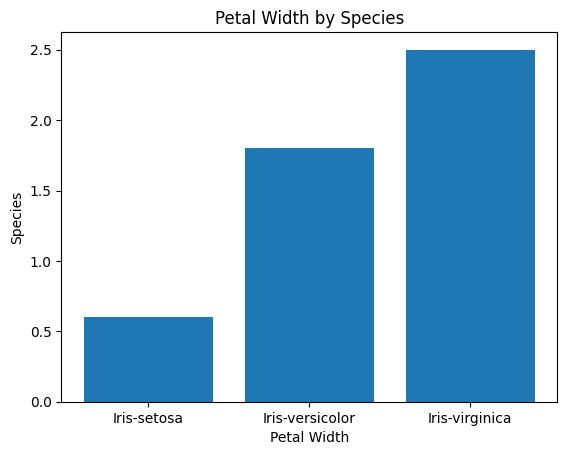

In [9]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# bar plots
plt.bar(data['Species'], data['PetalLengthCm'])
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

plt.bar(data['Species'], data['PetalWidthCm'])
plt.title('Petal Width by Species')
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])


In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
data['Species'].value_counts()


0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('Species', axis=1), data['Species'], test_size=0.2, random_state=42)


In [14]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [15]:
dt.score(x_test, y_test)


1.0

In [16]:
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
tree_rules = export_text(dt, feature_names=list(data.drop('Species', axis=1).columns))
print(tree_rules)

|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: 1
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- class: 2
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- SepalLengthCm <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SepalLengthCm >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: 2



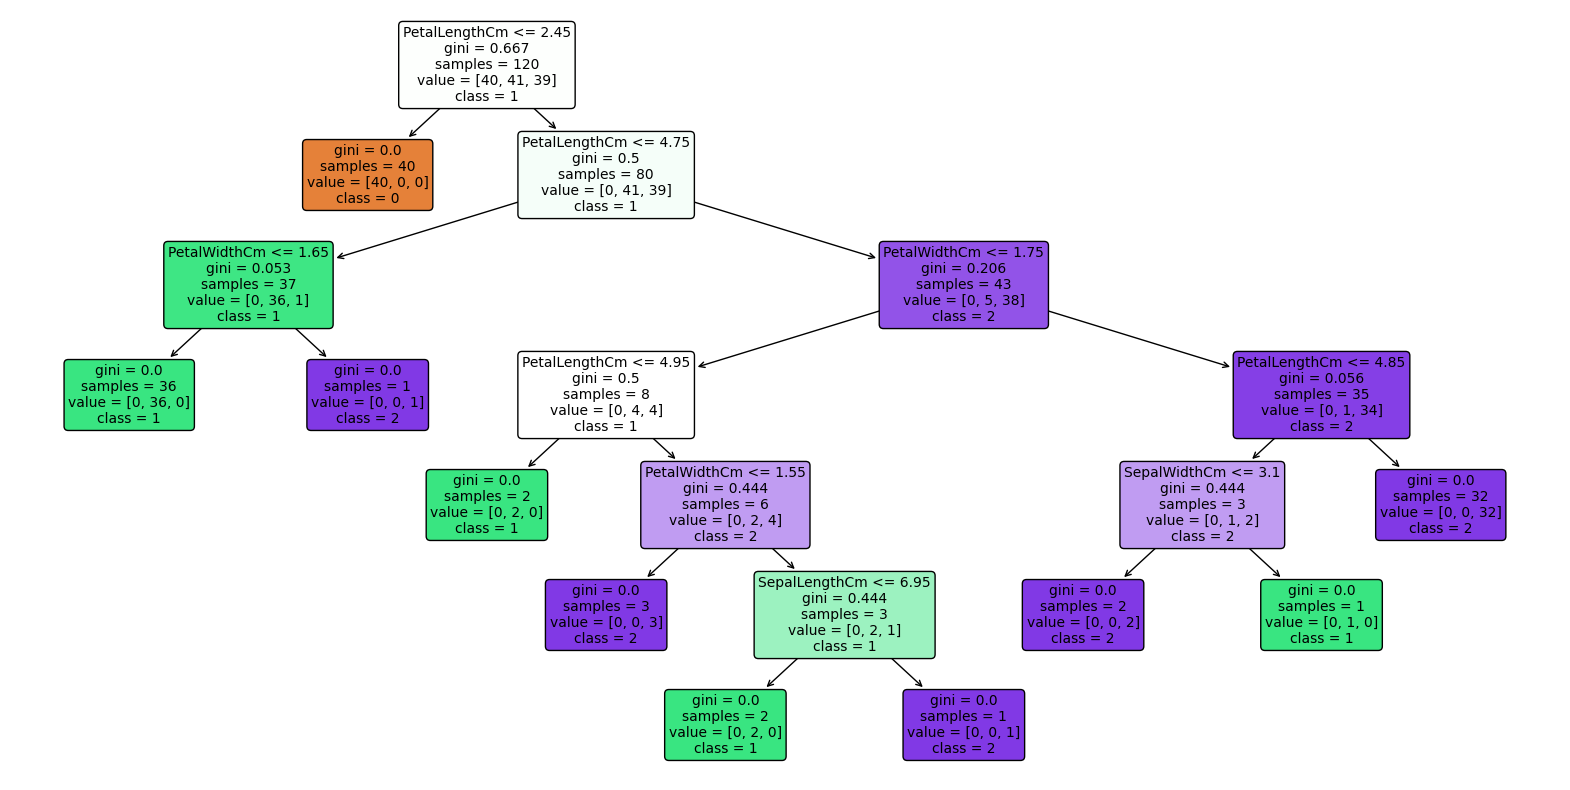

In [18]:
# Convert class labels to strings
class_names = list(map(str, dt.classes_))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=list(data.drop('Species', axis=1).columns), class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.show()

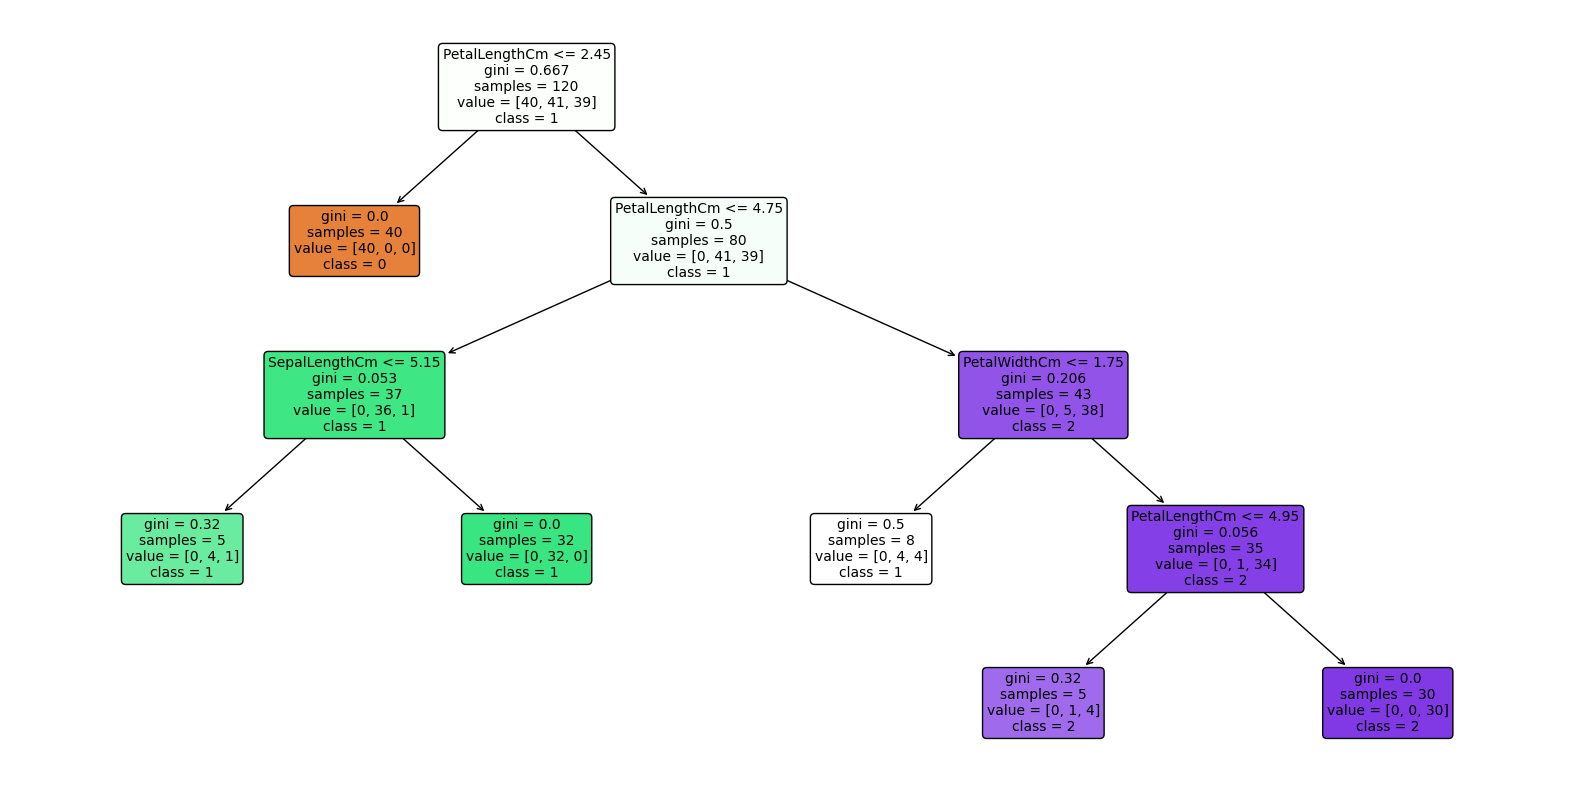

In [19]:
# Create a decision tree classifier with pruning (setting max_depth and min_samples_leaf)
dt_pruned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dt_pruned.fit(x_train, y_train)

# Convert class labels to strings
class_names = list(map(str, dt_pruned.classes_))

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, feature_names=list(data.drop('Species', axis=1).columns), class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.show()
